<a href="https://colab.research.google.com/github/kanzaki-coder/deeplearning/blob/update-1.1/weed_VGG16_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#gitから回す用（本番）

!git clone https://github.com/kanzaki-coder/deeplearning.git

Cloning into 'deeplearning'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 101 (delta 3), reused 0 (delta 0), pack-reused 91
Receiving objects: 100% (101/101), 466.05 MiB | 13.18 MiB/s, done.
Resolving deltas: 100% (38/38), done.
Checking out files: 100% (25/25), done.


In [0]:
#複数のzipを展開する場合はディレクトリを用意する必要がある。
%cd /content/deeplearning
!mkdir weed_type
%cd /content/deeplearning/weed_type
!mkdir ichibi
!mkdir mameasagao
!mkdir mehishiba
!mkdir oinutade

/content/deeplearning
/content/deeplearning/weed_type


In [0]:
#for文で回した方がいいかも？

#各ディレクトリにzipファイルを展開
%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/hakidamegiku.zip

%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/hamasuge.zip

%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/hosoaogeitou.zip

%cd /content/deeplearning/weed_type/ichibi
!unzip /content/deeplearning/ichibi_1.zip
!unzip /content/deeplearning/ichibi_2.zip
!unzip /content/deeplearning/ichibi_3.zip
!unzip /content/deeplearning/ichibi_4.zip
!unzip /content/deeplearning/ichibi_5.zip
!unzip /content/deeplearning/ichibi_6.zip

%cd /content/deeplearning/weed_type/mameasagao
!unzip /content/deeplearning/mameasagao_1.zip
!unzip /content/deeplearning/mameasagao_2.zip
!unzip /content/deeplearning/mameasagao_3.zip
!unzip /content/deeplearning/mameasagao_4.zip
!unzip /content/deeplearning/mameasagao_5.zip


%cd /content/deeplearning/weed_type/mehishiba
!unzip /content/deeplearning/mehishiba_1.zip
!unzip /content/deeplearning/mehishiba_2.zip
!unzip /content/deeplearning/mehishiba_3.zip
!unzip /content/deeplearning/mehishiba_4.zip

%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/ohishiba.zip

%cd /content/deeplearning/weed_type/oinutade
!unzip /content/deeplearning/oinutade_1.zip
!unzip /content/deeplearning/oinutade_2.zip


%cd /content/deeplearning/weed_type/
!unzip /content/deeplearning/shiroza.zip

#本番用ここまで

In [1]:
#ドライブでマウントする場合
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#VGG16とデータセット水増しを使う場合
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))


Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step








In [0]:

from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(9,activation='softmax'))
conv_base.trainable=False
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2313      
Total params: 16,814,409
Trainable params: 2,099,721
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

#clsdir = "/content/deeplearning/weed_type"
clsdir = "/content/drive/My Drive/cluster0312"

datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )

train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(150,150 ),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )


Found 3129 images belonging to 20 classes.
Found 775 images belonging to 20 classes.


In [0]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
    )

RuntimeError: ignored

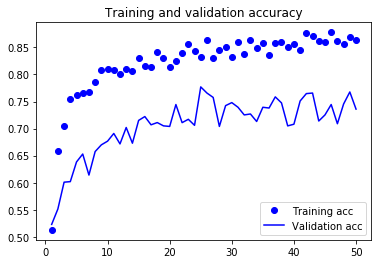

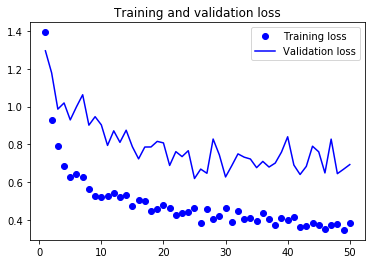

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
#ここからファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras.applications import VGG16

input_size=150
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(input_size,input_size,3))
#224,224までOK。

#cluster05用の20分類でチューニング

In [0]:
#畳み込み層の5層目のみを凍結解除
conv_base.summary()
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



In [0]:
#モデル確認
from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(20,activation='softmax'))



In [5]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image


#clsdir = "/content/deeplearning/weed_type"

clsdir = "/content/drive/My Drive/cluster0312"



datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )
#validation_splitでtrainとvalidationの比率を変更できる。


train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(input_size,input_size),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(input_size,input_size),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

Found 3129 images belonging to 20 classes.
Found 775 images belonging to 20 classes.


In [0]:
#モデルのコンパイル
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()


In [0]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

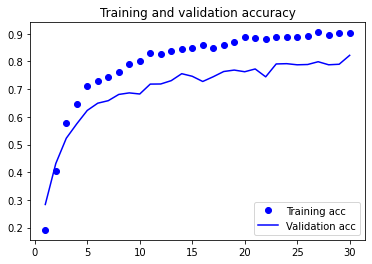

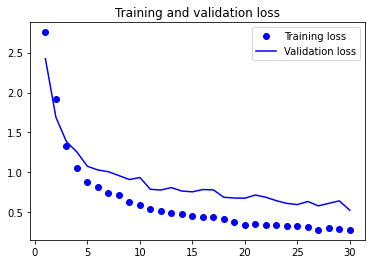

In [9]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
#モデルを保存するなら
model.save('weed_type.h5')

In [0]:
#モデルを呼び出す
model.load_weights('weed_type.h5')

In [0]:
#20分類のclassを入力
classes=["hakidamegiku","hakidamegiku","hosoaogeitou","hosoaogeitou","ichibi",
         "ichibi","inubie","inubie","kosendangusa","kosendangusa","mameasagao",
         "mameasagao","mehishiba","mehishiba","ohishiba","ohishiba","oinutade",
         "oinutade","shiroza","shiroza"]


以下の画像を判定します


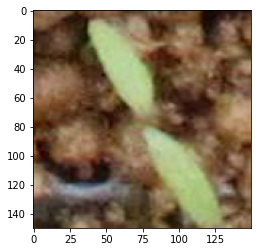

In [47]:

from PIL import Image

#img_path2= "/content/drive/My Drive/cluster0312/hakidamegiku1/hakidamegiku_IMG_1524_10.JPG"
img_path2= "/content/drive/My Drive/cluster0312/hosoaogeitou1/hosoaogeitou_IMG_1526_1.JPG"
#↑判定させたいpathを指定する

input_size=150

img = Image.open(img_path2).convert('RGB') 
img = img.resize((input_size,input_size))
x = np.array(img, dtype=np.float32)
x = x / 255.
plt.imshow(x)
print("以下の画像を判定します")

In [56]:

y=np.expand_dims(x,axis=0)
pred = model.predict(y, batch_size=1, verbose=0)

#最大の確率のものを抜き出す
pred_label = np.argmax(pred)
print(pred_label)

#もし各可能性を行列で見たい場合
print(pred)



2
[[1.0832795e-06 1.7035413e-07 6.0749620e-01 8.3503837e-06 7.4368756e-07
  7.7176702e-07 3.5547598e-03 2.1822278e-05 3.3925157e-03 4.3641386e-08
  3.5126081e-06 9.3071967e-06 5.1094778e-03 5.2436633e-04 4.1894829e-05
  3.6804822e-01 1.0804316e-02 1.9656323e-05 9.6277928e-04 2.8686520e-08]]


この画像はhosoaogeitouです


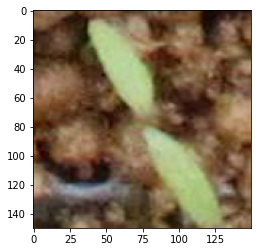

In [46]:
plt.imshow(x)
print("この画像は"+classes[pred_label]+"です")


In [69]:
#ここからtest:gradcamのための新しいモデル
from keras.layers import Dense, Dropout, Activation, Flatten

input_size=150
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_size,input_size, 3))
last = vgg_conv.output


vgg_conv.trainable = True

set_trainable = False
for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


mod = Flatten()(last)
mod = Dense(256, activation='relu')(mod)
#mod = Dropout(0.5)(mod)
preds = Dense(20, activation='softmax')(mod)

model = models.Model(vgg_conv.input, preds)

model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image


#clsdir = "/content/deeplearning/weed_type"

clsdir = "/content/drive/My Drive/cluster0312"



datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )
#validation_splitでtrainとvalidationの比率を変更できる。


train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(input_size,input_size),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(input_size,input_size),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

In [70]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 27s 269ms/step - loss: 2.8906 - acc: 0.1327 - val_loss: 2.5762 - val_acc: 0.2643
Epoch 2/30
100/100 [==============================] - 25s 247ms/step - loss: 2.0397 - acc: 0.3909 - val_loss: 1.7039 - val_acc: 0.4603
Epoch 3/30
100/100 [==============================] - 25s 248ms/step - loss: 1.3279 - acc: 0.5865 - val_loss: 1.3509 - val_acc: 0.5387
Epoch 4/30
100/100 [==============================] - 25s 253ms/step - loss: 1.0556 - acc: 0.6614 - val_loss: 1.2245 - val_acc: 0.5808
Epoch 5/30
100/100 [==============================] - 25s 245ms/step - loss: 0.8991 - acc: 0.7015 - val_loss: 1.0716 - val_acc: 0.6462
Epoch 6/30
100/100 [==============================] - 25s 245ms/step - loss: 0.7749 - acc: 0.7458 - val_loss: 0.9997 - val_acc: 0.6472
Epoch 7/30
100/100 [==============================] - 24s 244ms/step - loss: 0.7117 - acc: 0.7582 - val_loss: 1.0328 - val_acc: 0.6332
Epoch 8/30
100/100 [==============================] - 2

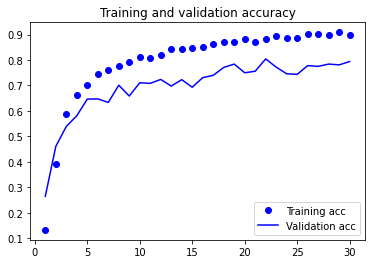

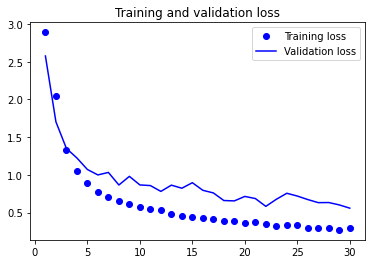

In [71]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
#モデルを保存するなら
model.save('weed_type.h6')
model.load_weights('weed_type.h6')

In [162]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
img_path2= "/content/drive/My Drive/cluster0312/mameasagao1/mameasagao_IMG_4176_2.JPG"

input_size=150
img=image.load_img(img_path2,target_size=(input_size,input_size))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)


In [0]:
from keras import backend as K


weed_check=model.output[:,5]
#ここで何番目に対応するレイヤーを持ってくるか。mameasagao1なら11

last_conv_layer=model.get_layer('block5_conv3')

grads=K.gradients(weed_check,last_conv_layer.output)[0]

pooled_grads=K.mean(grads,axis=(0,1,2))

iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])

pooled_grads_value,conv_layer_output_value=iterate([x])

for i in range(512):
    conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
    
heatmap=np.mean(conv_layer_output_value,axis=-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


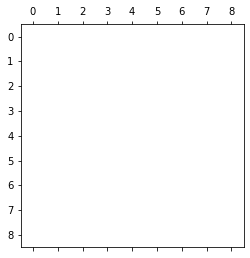

In [177]:
import matplotlib.pyplot as plt

heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

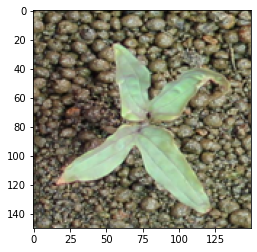

In [166]:
img = Image.open(img_path2).convert('RGB') 
img = img.resize((input_size,input_size))
z = np.array(img, dtype=np.float32)
z = z / 255.
plt.imshow(z)

In [167]:
import cv2

img = cv2.imread(img_path2)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap) 
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.5+ img


cv2.imwrite('/gradcam.jpg',superimposed_img)

#保存先のディレクトリと保存名を指定

True

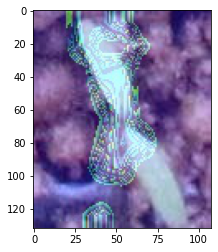

In [178]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/mame1.jpg')
imgplot = plt.imshow(img)

 #青みがかるのは仕様。